<a target="_blank" href="https://colab.research.google.com/github/acascur/simulation-methods/blob/main/simulation%20methods%20overview.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# Métodos de simulación - Arturo Castro Currás


En este informe de simulación expondré el código de los ejercicios realizados y un desarrollo teórico de cada uno de ellos.

In [ ]:
import numpy as np
import random as ran
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

## GEN1, 2 Y 3. *Generador lineal congruente de números pseudoaleatorios*

En este primer ejercicio lo que tratamos de implemetar es un generador lineal congruente de números pseudoaleatorios. Para la cúal vamos a emplear el algoritmo $X_{i+1}=Mod_m(a·X_i+c)$, fijando $c=0$ para que el generador sea multiplicativo congruente $(LCG)$ y escogiendo cuidadosamente $a$ para que el periodo de la secuencia no quede reducido muy por debajo del módlulo $m$ (parametro que limita el periodo de generador).

Comenzamos implementando el $LCG$ en una función que llamaremos para obtener el array de números aleatorios.

In [ ]:
def fun_generador(m, a, c, seed, size):
    x = []
    for i in range(0, size):
        seed = (a*seed+c) % m
        x.append(seed/float(m))
        
    return x

Seguidamente fijamos los parametros que vamos a emplear en el algoritmo, teniendo especialmente cuidado en la semilla (será el valor inicial de la generación de números pseudoaleatorios $X_0$ y módulo de la operación. Finalmente, llamamos a la función y obtenemos el array de números

In [ ]:
m = 5634523534
a = 16807 
c = 0
seed = 3
size = 100000

x = fun_generador(m, a, c, seed, size)

Representamos los valores obtenidos en un histograma $(GEN2)$

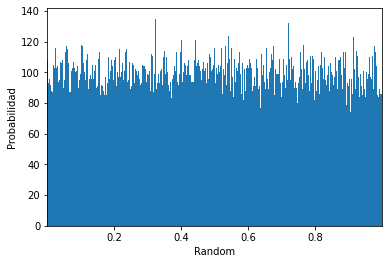

In [ ]:
plt.hist(x,bins=1000)
plt.xlabel('Random')
plt.xlim(min(x),max(x))
plt.ylabel('Probabilidad')
plt.show()

Seguidamente, como pide en el ejercicio $GEN3$ comprobamos que la distribución del espaciado entre los valores generados es "aproximadamente" exponecial. Para lo cual implementamos un bucle para calcularla.

In [ ]:
dis2=[]
for i in range(0, size, int(size/10)): #divido en menos rangos para que tarde menos
    for j in range(0,size):
        if i != j:
            dis = x[j]-x[i]
            dis=dis*dis
            dis2.append(dis)

Finalmente, representamos los valores para poder observar el comportamiento exponencial.

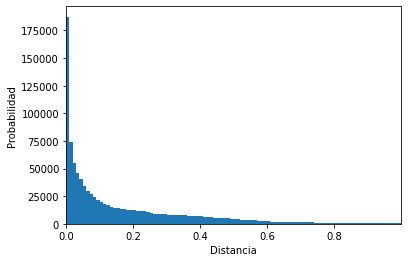

In [ ]:
plt.figure()
plt.hist(dis2, bins=100)
plt.xlabel('Distancia')
plt.ylabel('Probabilidad')
plt.xlim(min(dis2), max(dis2))
plt.show() 

## GEN6. *Planos de Marsaglia*

Aprovechando lo explicado en el ejercicio anterior, este ejercicio consiste en demostrar que para el generador congruente de números pseudoaleatorios, dependiendo del módulo que determina la periodicidad y si colocamos los números generados en las posiciones $x, y, z$ del espacio. Puede verse como estos puntos se distribuyen en planos conocidos como "Planos de Marsaglia"

Primero implemento una función generatriz de los números pseudoaleatorios que los coloque consecutivamente en los planos $x, y, z$

In [ ]:
def fun_generador(m, a, c, seed, size):
    
    x, y, z = [], [], []
    for i in range(size):
        seed = (a * seed + c) % m
        x.append(seed / float(m))
        seed = (a * seed + c) % m
        y.append(seed / float(m))
        seed = (a * seed + c) % m
        z.append(seed / float(m))
        
    return x, y, z

Fijo los parametros iniciales y llamo a la función para obtener los  arrays de números. He variado $m$ con el objetivo de ver dos ejemplos.

In [ ]:
a = 16807 
c = 0
seed = 3
size = 10000
x, y, z = fun_generador(1234, a, c, seed, size)
x2, y2, z2 = fun_generador(123456, a, c, seed, size)

Finalmente, gráfico los resultados en dos proyecciones en el espacio $3D$

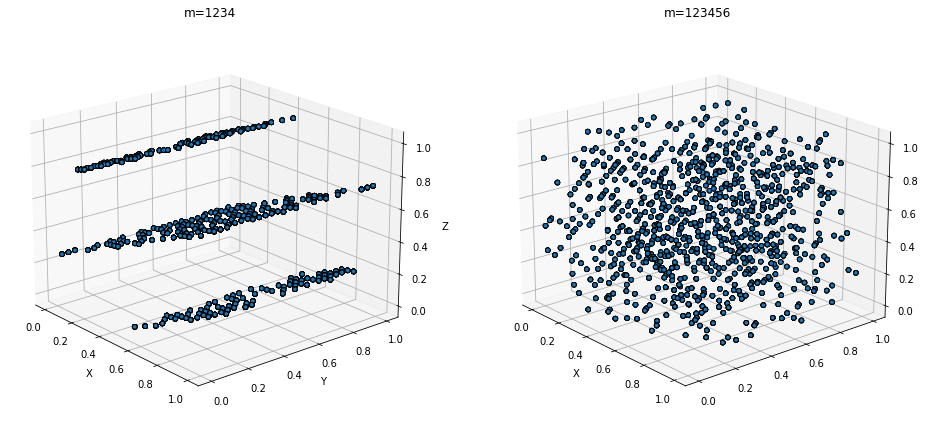

In [ ]:
fig = plt.figure(figsize=(16, 10))
ax = fig.add_subplot(1, 2, 1, projection = '3d')
ax.set_title('m=1234')
ax.scatter(x, y, z, linewidths=1., edgecolors='k')
ax.set_xlabel('X'), ax.set_ylabel('Y'), ax.set_zlabel('Z')
ax.view_init(elev = 20, azim = -40)

ax2 = fig.add_subplot(1, 2, 2, projection = '3d')
ax2.set_title('m=123456')
ax2.scatter(x2, y2, z2, linewidths=1., edgecolors='k')
ax2.set_xlabel('X'), ax.set_ylabel('Y'), ax.set_zlabel('Z')
ax2.view_init(elev = 20, azim = -40)

plt.show()

En el de la $derecha$ el módulo es alto (el rango de valores que puede tomar cada puntos es mayor) y los puntos crean una red con una periocidad baja distribuyendo los puntos de una manera más "aleatoria" (con un m grande no es posible encontrar el patrón de distribución de los puntos). 

Para la gráfica de la $izquierda$ puede verse como al reducir el módulo y por tanto el rango de valores que pueden tomar los números aleatorios, podemos apreciar los planos.

Vemos entonces como se pone en manifiesto un defecto de los $LCG$, debido a la periodicidad intrínseca del método, los puntos aleatorios generados se distribuyen en planos siguiendo un patrón identificable. Este efecto es debido a la repetición de las secuencias de los aleatorios generados y denota la "pseudoaletoriedad" del generador.

Estos planos reciben el nombre de Planos de Marsaglia, ya que fué el primero en notar este inevitable defecto de los $LCG$.

## MUE1. *Distribución de probabilidad acumulada*

El objetivo de este ejercicio es conseguir escribir un programa que permita calcular
números aleatorios que sigan una distribución de probabilidad determinada y comparar
el histograma de valores obtenidos con la función esperada $p(x) = \mu e^{-\mu x}$, siguiendo los datos aportados en la transparencia 59 del Tema2_2.

Para ello, hace falta calcular la distribución de probabilidad acumulada:
$P(x) = 1-e^{- \mu x} = r$. Dónde $r$ va a tomar valores entre 0 y 1 que se generan pseudoaleatoriamente (en este caso con la
función random de Python). Luego, se despeja x:

$$
x = - \left ( \frac{1}{\mu} \right )ln(r)
$$

Introducimos el valor del coeficiente de interacción $\mu$ y el número de interacciones que queremos realizar. Definimos seguidamente la distribucion de probabilidad y la función de probabilidad acumulada inversa

In [ ]:
mu = 0.5 #valor de mu
n = 100000 #numero de iteraciones

prob = lambda x: mu*np.exp(-mu*x) #defino la distribucion de probabilidad 
fun = lambda x: (-1/mu)*np.log(x) #defino la funcion de probabilidad acumulada inversa

Tomamos valores aleatorios en el intervalo $[0,1]$ para la variable $r$.

In [ ]:
r = [np.random.rand() for i in range(n)] #calulo los numeros aleatorios y aplico la funcion inversa
x = fun(r)

Grafico los resultados, de forma que podemos comparar el histograma producido con la función esperada. 

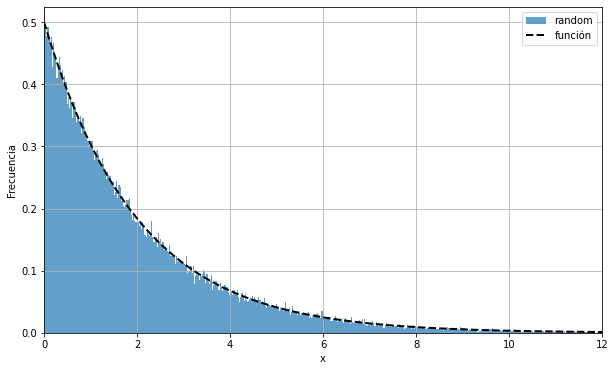

In [ ]:
xmin, xmax = 0, 12
y = np.linspace(xmin,xmax,n) #defino limites para mi gráfica

plt.figure(figsize=(10,6))
plt.xlabel('x')
plt.ylabel('Frecuencia')
plt.hist(x, bins=1000, density=True, alpha=0.7, label='random')
plt.xlim(xmin,xmax)
plt.plot(y, prob(y),'k--' ,linewidth=2, label='función')
plt.legend(); plt.grid()

Vemos como de esta forma los números generados siguen la distribuvión esperada.

## MUE2. *Muestreo*

El objetivo de este ejercicio es similar al anterior, en este caso la  función esperada es 
$p(x)=2(1-x)$
Para ello, hace falta calcular la distribución de probabilidad acumulada:
$P(x) = 1- (1-x)^2 = r$.
En este caso, igual que en el anterior $r$ va a tomar valores entre 0 y 1 que se generan aleatoriamente. Luego, se despeja x:

$$
x = \frac{-2 \pm \sqrt{4-4r} }{-2}
$$

Para cumplir las condiciones iniciales de que $0 \leq x \leq 1$ sólo se puede escoger el signo
'+' de la solución.

Introducimos el numero de iteracciones y de bins del histograma.

In [ ]:
N     = int(1e5)   #Cantidad de números a generar.
nbins = 1000       #Número de bins en el histograma.

Generamos los numeros aleatorios y definimos las funciones de distribución esperadas y la de acumulada inversa.

In [ ]:
r  = [np.random.rand() for i in range(N)]  #numeros aleatorios
x  = [-0.5*(-2+np.sqrt(4-4*i)) for i in r] #funcion acumulada inversa
prob = [2*(1 - i) for i in x]              #funcion de probabilidad esperada

Dibujamos el histograma de los valores obtenidos para poder comparar con la función esperada.

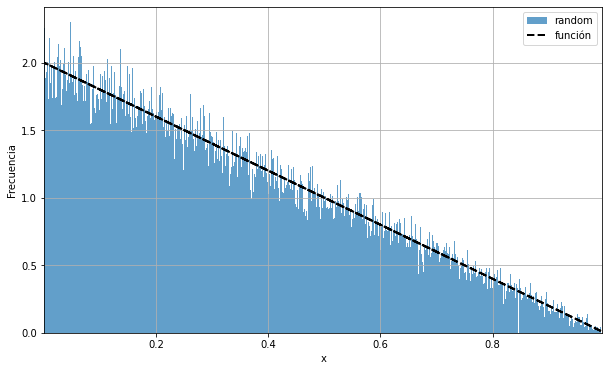

In [ ]:
plt.figure(figsize=(10,6))
plt.hist(x, bins=1000, density=True, alpha=0.7, label='random')
plt.plot(x, prob, 'k--' ,linewidth=2, label='función')
plt.xlim(min(x), max(x))
plt.xlabel('x')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.legend()
plt.show()

Podemos ver, como grácias a este método de la distribucion de probabilidad acumulada inversa, somos capaces de obtener números aleatorios que sigan distribuciones de probabilidad arbitrarias. Siempre que estas funciones de distribución acumuladas que generen sean inversibles. Tanto como para el ejercicio $MUE1$ como $MUE2$

## IN1. *Monte-Carlo y teorema del valor medio*

El objetivo de este ejercicio es realizar un programa capaz de calcular las siguientes integrales mediante los dos métodos vistos en clase que emplean Monte-Carlo. El método de muestreo y el teorema del valor medio.

$f(x)=x$ entre 0 y 1

$f(x)=x^2$ entre 0 y 1

Primeramente, fijo los límites de integración y defino las dos funciones que vamos a integrar.

In [ ]:
x0 = 0 #pongo los limites inferior y superior
x1 = 1

n = 5000 #fijo el numero de iteraciones a realizar

def fun1(x): #defino las dos funciones del problema f(x)=x y f(x)=x^2
    return x 

def fun2(x):
    return x**2 

El método de muestreo consiste en generar valores aleatorios de los pares de variables $x,y$ distribuidos uniformemente en el intervalo $[0,1]$ y comprobar la fracción de ocasiones en las que $y<f(x)$. Finalmente obtendremos el valor aproximado de la integral por la relación:

$$
F=M(b-a) \frac{n_s}{n}
$$

Con $n$ el número de pares de aleatorios generados y $n_s$ el número de veces que $y<f(x)$

Implementamos la función que calculará la integral por método de muestreo y devolvera el valor de la integral así como los puntos rechazados y aceptados para su posterior representación. Tendremos así una representación visual del método. 

He fijado anteriormente el número de pares generados $n$ en 5000 porque de ser un valor muy alto la gráfica quedaría muy saturada y no se distinguirian los puntos.

In [ ]:
def muestreo(a, b, fun, n):
    
    y0 = fun(x0) #Límite del recorrido asociado a x0.
    y1 = fun(x1) #Límite del recorrido asociado a x1.
    
    ns = 0  #Número de puntos aleatorios aceptados (y<f(x))
    xs = [] #Componente x de los puntos exitosos/aceptados.
    ys = [] #Componente y de los puntos exitosos.
    xr = [] #Componente x de los puntos fracasados/rechazados.
    yr = [] #Componente y de los puntos fracasados.
    
    for i in range(n):
        
        x = ran.random() * (x1-x0) + x0 
        y = ran.random() * (y1-y0) + y0 
        
        if y <= fun(x):
            
            ns = ns + 1
            xs.append(x)
            ys.append(y)
            
        else:
            
            xr.append(x)
            yr.append(y)
            
    F = y1 * (x1-x0) * (ns/n) 

    return F, xs, ys, xr, yr

El teorema del valor medio nos dice que la integral definida de la funcion $f(x)$ es igual al valor medio del inegrando $f(x)$ en el rango $0 \leq x \leq 1$. 

Utilizando esto, el método se basa en generar $n$ números aleatorios sobre este rango y determinar el valor de $f(x)$. La estimación de la integral será de la forma:
$$
F_n = (1-0) <f(x)>
$$

Implementamos la función que calculará la integral por el teorema del valor medio.

In [ ]:
def valor_medio(a, b, fun, n):
    
    x = [ran.random()*(x1-x0) + x0 for i in range(n)]
    y = [fun(i) for i in x]
    
    F = (b-a) * sum(y)/n

    return F

Llamando a las funciones que implementamos, obtenemos todos los datos necesarios y los valores de las integrales mediante los dos métodos.

In [ ]:
F, xs, ys, xr, yr = muestreo(x0, x1, fun1, n)
print('\nEl valor de la integral de f(x)=x entre (0,1) mediante muestreo es:', F)

F1 = valor_medio(x0, x1, fun1, n)
print('El valor de la integral de f(x)=x entre (0,1) mediante el TDVM es:', F1)

F2, xs1, ys1, xr1, yr1 = muestreo(x0, x1, fun2, n)
print('\nEl valor de la integral de f(x)=x^2 entre (0,1) mediante muestreo es:', F2)

F3 = valor_medio(x0, x1, fun2, n)
print('El valor de la integral de f(x)=x^2 entre (0,1) mediante el TDVM es:', F3)


El valor de la integral de f(x)=x entre (0,1) mediante muestreo es: 0.5022
El valor de la integral de f(x)=x entre (0,1) mediante el TDVM es: 0.5037008062985798

El valor de la integral de f(x)=x^2 entre (0,1) mediante muestreo es: 0.3256
El valor de la integral de f(x)=x^2 entre (0,1) mediante el TDVM es: 0.34180647954322696


El valor analítico de las dos integrales sería $0.5$ para $f(x)=x$ y $0.333$ para $f(x)=x^2$, concuerda bastante con los valores obtenidos.

A continuación presento una representación gráfica de como funciona el método de muestreo para las dos funciones.

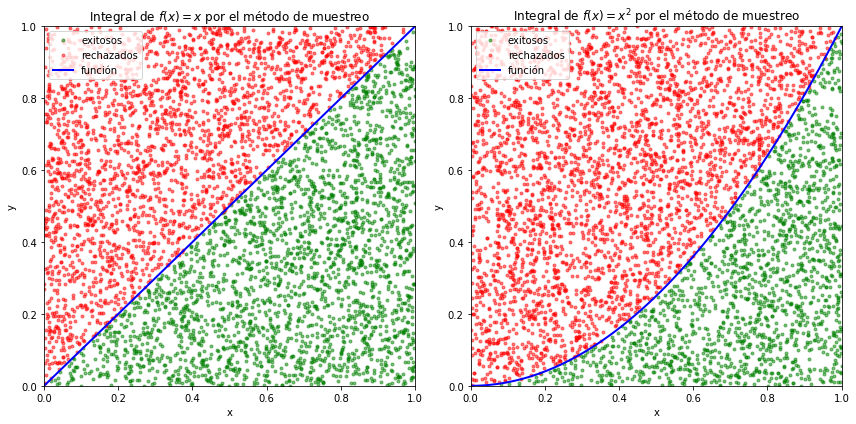

In [ ]:
fig = plt.figure(figsize=(12, 6))

ax = fig.add_subplot(1, 2, 1)
ax.set_title('Integral de $f(x) = x$ por el método de muestreo')
ax.plot(xs, ys, 'g.', label='exitosos', alpha=0.5)
ax.plot(xr, yr, 'r.', label='rechazados', alpha=0.5)
x = np.linspace(x0, x1, 100)
y = [fun1(i) for i in x]
ax.plot(x, y, 'b', linewidth = 2, label='función')
ax.legend(loc=2)
ax.set_xlim(min(x), max(x))
ax.set_ylim(min(y), max(y))
ax.set_xlabel('x')
ax.set_ylabel('y')

ax1 = fig.add_subplot(1, 2, 2)
ax1.set_title('Integral de $f(x) = x^2$ por el método de muestreo')
ax1.plot(xs1, ys1, 'g.', label='exitosos', alpha=0.5)
ax1.plot(xr1, yr1, 'r.', label='rechazados', alpha=0.5)
y = [fun2(i) for i in x]
ax1.plot(x, y, 'b', linewidth = 2, label='función')
ax1.legend(loc=2)
ax1.set_xlim(min(x), max(x))
ax1.set_ylim(min(y), max(y))
ax1.set_xlabel('x')
ax1.set_ylabel('y')

plt.tight_layout()
plt.show()

En verde tenemos el número de puntos aceptazos y en rojo los rechazados, la línea azul representa la función en el intervalo utilizado para el cálculo de la inegral

## INT3. *Integral de varias dimensiones por muestreo y teorema del valor medio*

El objetivo de este ejercicio es realizar un programa capaz de calcular la integral de varias dimensiones:

$$
\int_0^{7/10}\Big(\int_0^{4/5}\Big(\int_0^{9/10}\Big(\int_0^{1}\Big(\int_0^{11/10} \sqrt{6-x^2-y^2-z^2-u^2-w^2}dw\Big)du\Big)dz\Big)dy\Big)dx
$$

Aunque este ejercicio pide el cálculo por cualquier método, he decidido inplementar los dos vistos en clase.

Implemento los límites de integración y la función a integrar.

In [ ]:
#Límites de las diferentes variables en el dominio de integración.
w0 = 0
w1 = 7/10
u0 = 0
u1 = 4/5
z0 = 0
z1 = 9/10
y0 = 0
y1 = 1
x0 = 0  
x1 = 11/10 

numit = int(1e5)  #Número de iteraciones en el cálculo.

#Función a integrar.
def f1(w, u, z, y, x):   
    return np.sqrt(6 - x*x - y*y - z*z - u*u - w*w)

Como en ele ejercicio $INT1$ pero con algunos cambios debido a la multidimensionalidad de la inegral defino la función que calculará la integral por muestreo.

In [ ]:
def muestreo(fun, numit, x0, x1):
    
    N  = len(x0)   #Número de variables independientes.
    na = 0         #Número de intentos exitosos.

    y0   = fun(*x0)  #Valor de la función en el límite inferior de las variables.
    y1   = fun(*x1)  #Valor de la función en el límite superior de las variables.
    ymax = max(y0, y1)
    
    for i in range(numit):
        
        #Vector con los valores aleatorios de las variables independientes:
        x = [ran.random() * (x1[j]-x0[j]) + x0[j] for j in range(N)]
        y = ran.random() * ymax # Valor de la variable dependiente [0, ymax].
        
        
        # Si el valor de la variable dependiente aleatoria es menor que el 
        # valor de la función calculada en x, añado 1 al contador de puntos
        #aceptados.
        if y <= fun(*x):
            na = na + 1
            
    F = ymax * (na/numit)
    for i in range(N):
        F = F * (x1[i]-x0[i]) 

    return F

Procedo de la misma forma para el teorema del valor medio

In [ ]:
def valor_medio(fun, numit, x0, x1):
    
    N = len(x0) 
    
    y = []
    
    for i in range(numit):
        
        x = [ran.random() * (x1[j]-x0[j]) + x0[j] for j in range(N)]
        y.append(fun(*x))
        
    F = sum(y)/numit
    for j in range (N):
        F = F *(x1[j]-x0[j])

    return F

Finalmente obtengo los resultados de la integral por los dos métodos para $10^5$ iteraciones:

In [ ]:
resultado_1 = muestreo(f1, numit, [w0, u0, z0, y0, x0], [w1, u1, z1, y1, x1])
print('\nEl resultado de la integral por muestreo es:', resultado_1)

resultado_2 = valor_medio(f1, numit, [w0, u0, z0, y0, x0], [w1, u1, z1, y1, x1])
print('El resultado de la integral por el TDVM es :', resultado_2)


El resultado de la integral por muestreo es: 1.189252392088035
El resultado de la integral por el TDVM es : 1.1888990310080536


El valor analítico de la integral es $1.18$ por lo que el método es bastante aproximado.

## ALE5. *Potencial eléctrico mediante camino aleatorio*

El objetivo de este ejercicio es determinar el potencial eléctrico en una caja de $10x20x30$ $cm^3$ que tiene las tapas conectadas a $100$ $V$ y los lados a $0$ $V$ mediante el método de caminos aleatorios. Después, representaremos el resultado gráficamente.

Comienzo implementando los límites de la caja y el número de segmentos en los que divido cada uno de los ejes. También defino las condiciones de contorno del problema y las probabilidades de ir hacia "adelante" en cada eje.

In [ ]:
import random

#La caja va entre 0 y 10 en x:
x1 = 0
x2 = 10

#La caja va entre 0 y 20 en y:
y1 = 0
y2 = 20

#La caja va entre 0 y 30 en z:
z1 = 0
z2 = 30


nx = 10 #Número de segmentos en los que divido el eje x.
ny = 10 #Número de segmentos en los que divido el eje y.
nz = 10 #Número de segmentos en los que divido el eje z.


num_it = 10000 #Número de iteraciones a realizar.


#Defino las condiciones de contorno:
V_tapas = 100
V_lados = 0


#Esta función me da el potencial en los bordes en función del valor de z:
def CC(z):
    
    if z == z1 or z == z2:
        V = V_tapas
    else:
        V = V_lados
    
    return V
    
#Creo un array tridimensional que me almacene el potencial de cada nodo:
V = np.zeros((nx+1, ny+1, nz+1))

#Añado las C.C.:
V[:, :, 0] = 100
V[:, :,nz] = 100


pasox = 10/nx #Distancia entre nodos en el eje x.
pasoy = 20/ny #Distancia entre nodos en el eje y.
pasoz = 30/nz #Distancia entre nodos en el eje z.

px    = 0.5   #Probabilidad de que el camino vaya hacia delante en x.
py    = 0.5   #Probabilidad de que el camino vaya hacia delante en y.
pz    = 0.5   #Probabilidad de que el camino vaya hacia delante en z.

La idea es ir por un camino aleatorio desde un punto de la caja hasta un borde muchas veces y promediar el potencial de los bordes a los que se llega para calcular el del punto de origen. Por lo que calculo un camino desde cada punto del espacio hasta llegar a un borde. A continuación implemento el algoritmo comentado en cada linea.

La precisión del potencial va a depender de la cantidad de iteraciones realizadas y la resolución espacial del potencial va a depender de la cantidad de nodos que escojamos en la malla. Debido a la forma del programa, el tiempo de ejecución depende en gran medida con la cantidad de iteraciones. Como mi ordenador no tiene unas muy buenas características técnicas he decidido escoger $1000$ iteraciones. De lo contrario, tardaría muchísimo en correr.

In [ ]:
#Calculo un camino desde cada punto del espacio hasta llegar a un borde:
#No hace falta calcular el potencial en los bordes porque son C.C.
for n in range(num_it):
    for i in range(1, nx):
        for j in range(1, ny):
            for k in range(1, nz):
                
                #Me situo en el punto de la malla:
                x = i*pasox
                y = j*pasoy
                z = k*pasoz
    
                #Se hace camino aleatorio en 3D hasta llegar a un borde:
                while x1<x and x<x2 and y1<y and y<y2 and z1<z and z<z2:
                    
                    #Creo un valor que me va a determinar en que eje me muevo:
                    eje = random.random()
                    
                    if eje <= 1/3: #Me muevo en el eje x.
                        if random.random() <= px:
                            x = x + pasox
                        else:
                            x = x - pasox
                    
                    if eje >= 1/3 and eje <= 2/3: #Me muevo en el eje y.
                        if random.random() <= py:
                            y = y + pasoy
                        else:
                            y = y - pasoy
                    
                    if eje >= 2/3: #Me muevo en el eje z.
                        if random.random() <= pz:
                            z = z + pasoz
                        else:
                            z = z - pasoz
                
                #LLamo a la función que me da el potencial del borde de la caja
                #Sumo el potencial al obtenido de iteraciones anteriores.
                V[i, j, k] = V[i, j, k] + CC(z)

Tras realizar todas las iteraciones, promedio el potencial en los nodos y debo volver a añadir las condiciones de contorno ya que el potencial en las tapas también se divide:

In [ ]:
V = V/num_it

V[:, :, 0] = 100
V[:, :,nz] = 100

A continuación grafico los resultados onbtenidos para cada plano $x,y,z$

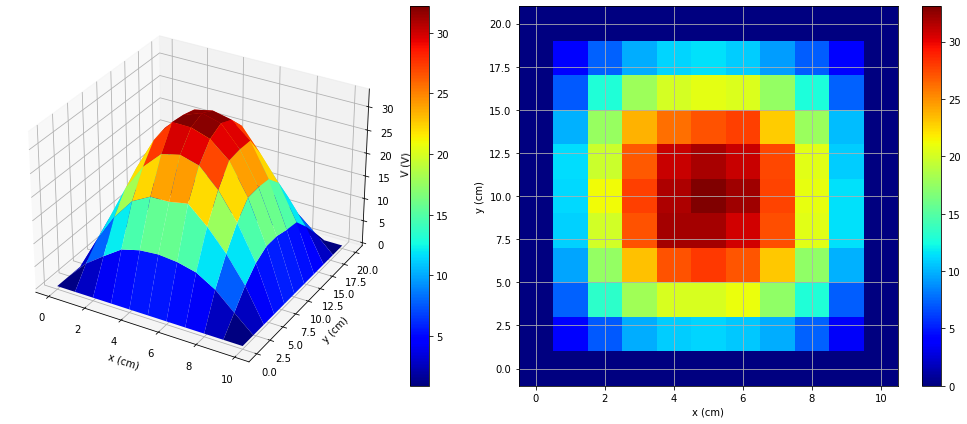

In [ ]:
plt.close('all')

x_vec = np.linspace(x1, x2, nx+1) #Vector con los nodos del eje x.
y_vec = np.linspace(y1, y2, ny+1) #Vector con los nodos del eje y.
z_vec = np.linspace(z1, z2, nz+1) #Vector con los nodos del eje z.


a, b = np.meshgrid(x_vec, y_vec, indexing = 'ij')

fig = plt.figure(figsize=(14,6))
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
c = ax1.plot_surface(a, b, V[:, :, int(nz/2)], cmap=cm.jet, alpha=1)
ax1.set_xlabel('x (cm)')
ax1.set_ylabel('y (cm)')
ax1.set_zlabel('V (V)')
ax1.grid(True)
fig.colorbar(c)

ax2 = fig.add_subplot(1, 2, 2)
c=ax2.pcolormesh(a, b, V[:, :, int(nz/2)], cmap=cm.jet, shading='auto')
ax2.set_xlabel('x (cm)')
ax2.set_ylabel('y (cm)')
ax2.grid(True)
fig.colorbar(c)
fig.tight_layout()

Potencial en el plano $x-y$ a $z=cte$

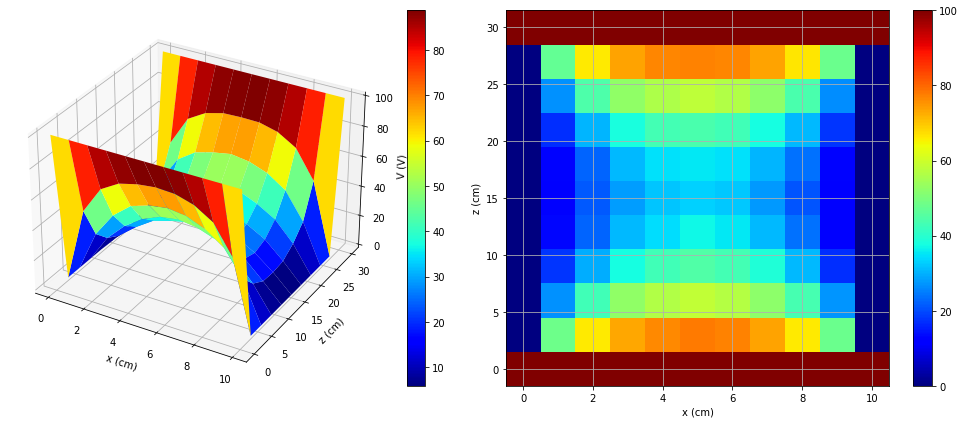

In [ ]:
a, b = np.meshgrid(x_vec, z_vec, indexing = 'ij')

fig = plt.figure(figsize=(14,6))
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
c = ax1.plot_surface(a, b, V[:, int(ny/2), :], cmap=cm.jet, alpha=1)
ax1.set_xlabel('x (cm)')
ax1.set_ylabel('z (cm)')
ax1.set_zlabel('V (V)')
ax1.grid(True)
fig.colorbar(c)

ax2 = fig.add_subplot(1, 2, 2)
c=ax2.pcolormesh(a, b, V[:,int(ny/2), :], cmap=cm.jet, shading='auto')
ax2.set_xlabel('x (cm)')
ax2.set_ylabel('z (cm)')
ax2.grid(True)
fig.colorbar(c)
fig.tight_layout()

Potencial en el plano $x-z$ a $y=cte$

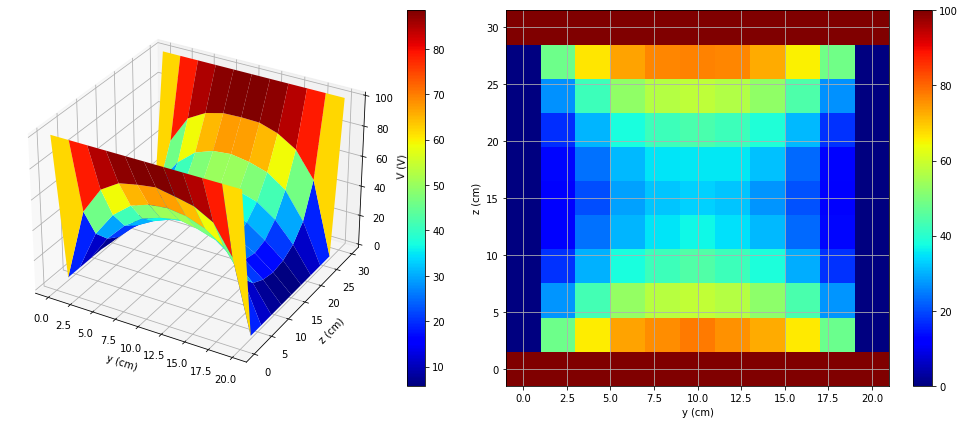

In [ ]:
a, b = np.meshgrid(y_vec, z_vec,indexing = 'ij')

fig = plt.figure(figsize=(14,6))
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
c = ax1.plot_surface(a, b, V[int(nx/2), :, :], cmap=cm.jet, alpha=1)
ax1.set_xlabel('y (cm)')
ax1.set_ylabel('z (cm)')
ax1.set_zlabel('V (V)')
ax1.grid(True)
fig.colorbar(c)

ax2 = fig.add_subplot(1, 2, 2)
c=ax2.pcolormesh(a, b, V[int(nx/2), :, :], cmap=cm.jet, shading='auto')
ax2.set_xlabel('y (cm)')
ax2.set_ylabel('z (cm)')
ax2.grid(True)
fig.colorbar(c)
fig.tight_layout()

Potencial en el plano $z-y$ a $x=cte$

Este método por números pseudoaleatorios presenta una ventaja con respecto al método de diferencias finitas visto
en la parte de la asignatura con Diego. En este último, debido a la forma de recorrer los nodos calculando el potencial, el valor de unos nodos dependá del valor en otros nodos y se iban arrastrando errores. Los gradientes de potencial interno incluso dependían de la cantidad de iteraciones. 

El método de camino aleatorio no presenta este problema, pues todos los nodos se calculan independientemente de los demás y la forma del potencial interno no es tan sensible al número de iteraciones ni al de nodos.